# Exercises Week 9 Unsupervised Learning

## Question 1

On the book website, www.StatLearning.com, there is a gene expression data set ([Ch10Ex11.csv](https://www.statlearning.com/s/Ch10Ex11.csv)) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans as KM
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### (a) Load in the data using `read_csv()`. You will need to select `header=None`.

In [2]:
df=pd.read_csv("Ch10Ex11.csv",header=None).T #transpose to make the tissue samples not the genes our unit of analysis
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


### (b) Apply hierarchical clustering to the samples using correlationbased distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

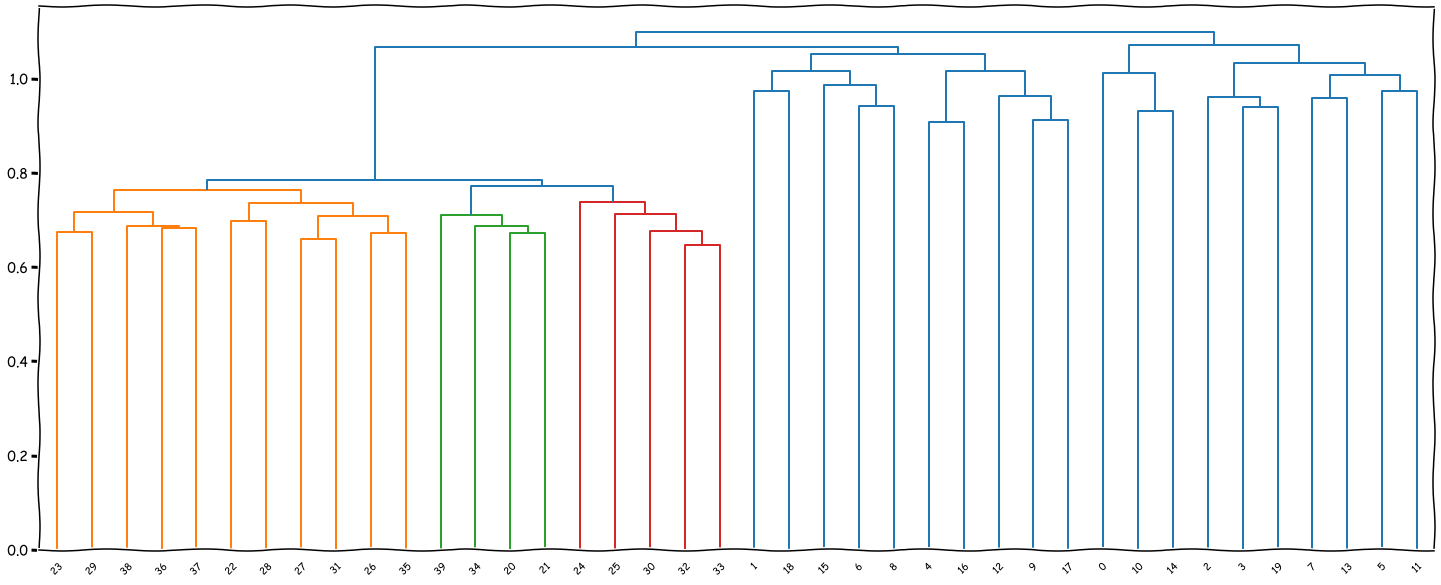

In [3]:
hc_complete=linkage(y=df,method='complete',metric='correlation')

plt.xkcd()
plt.figure(figsize=(25,10))
dend=dendrogram(hc_complete,leaf_font_size=10)

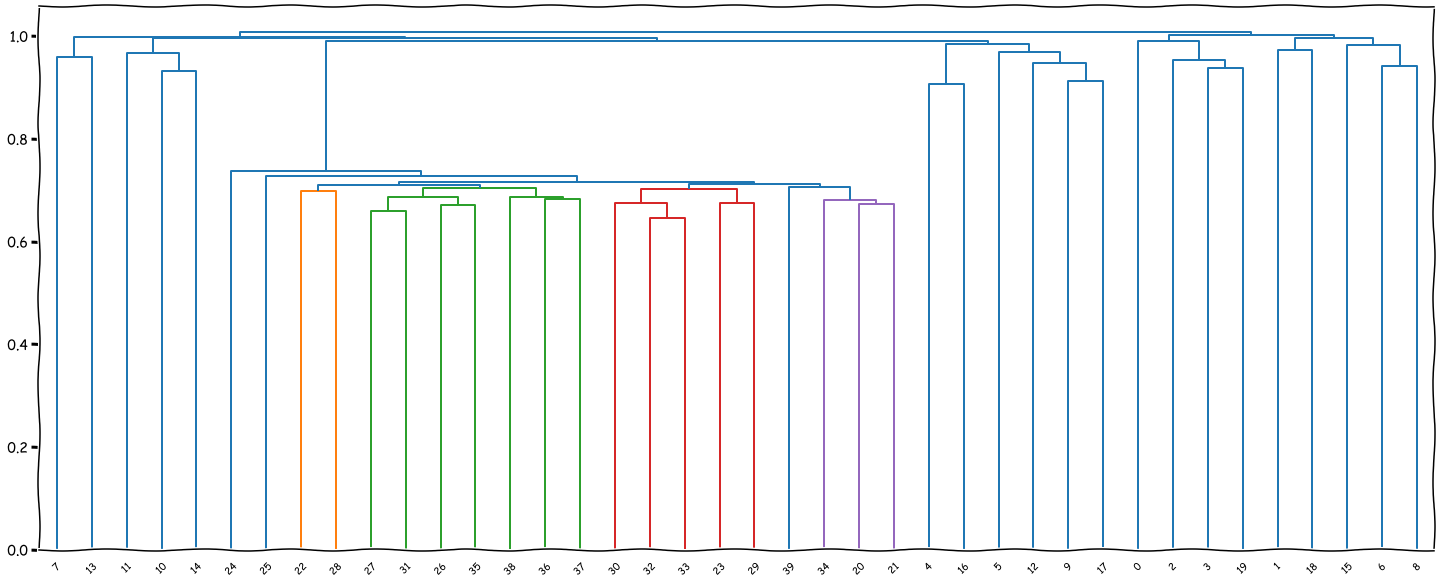

In [4]:
hc_average=linkage(y=df,method='average',metric='correlation')

plt.xkcd()
plt.figure(figsize=(25,10))
dend=dendrogram(hc_average,leaf_font_size=10)

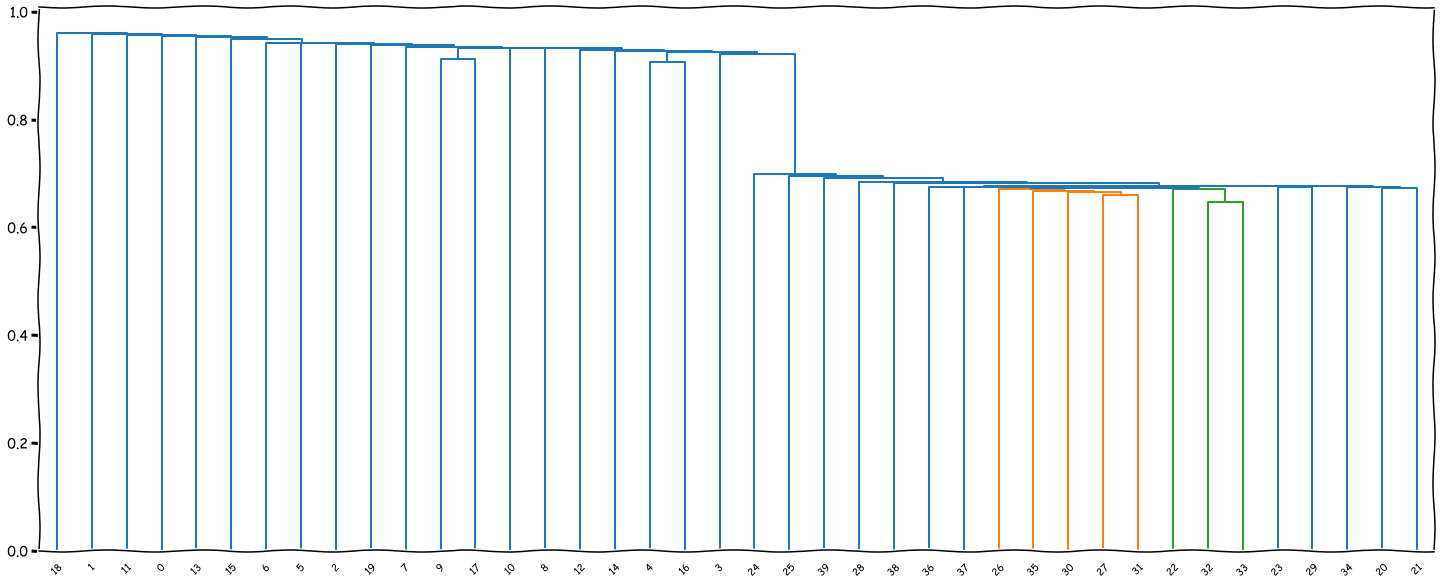

In [5]:
hc_single=linkage(y=df,method='single',metric='correlation')

plt.xkcd()
plt.figure(figsize=(25,10))
dend=dendrogram(hc_single,leaf_font_size=10)

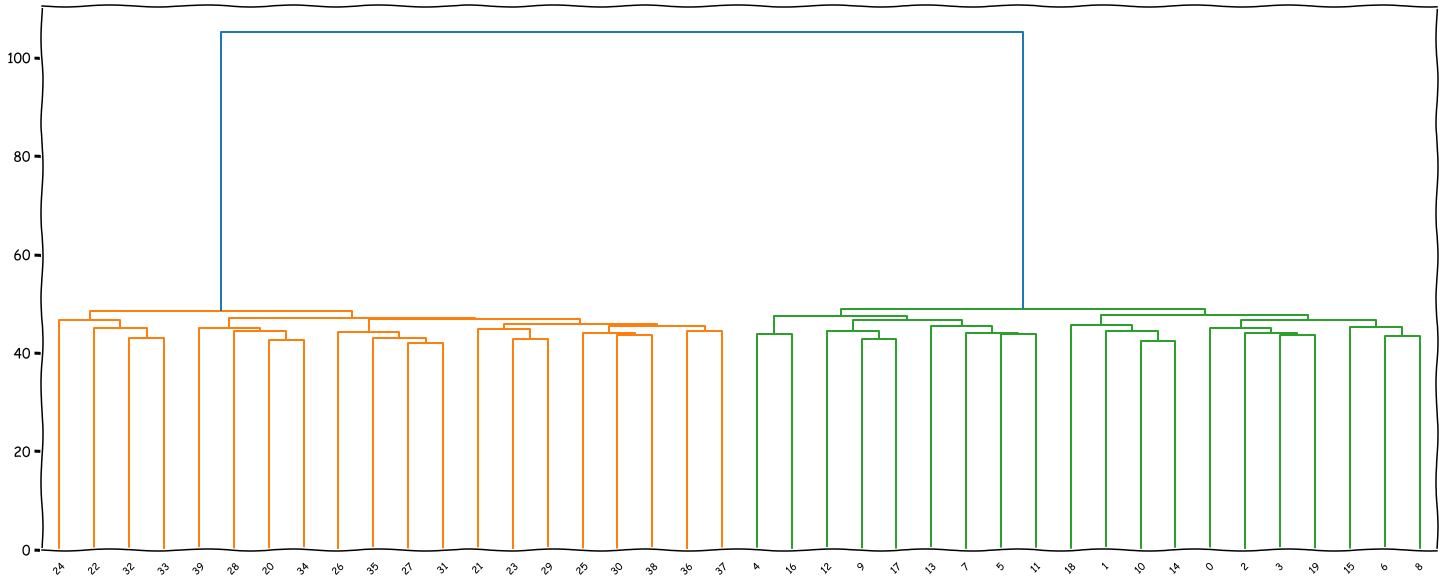

In [6]:
hc_centroid=linkage(y=df,method='ward',metric='euclidean') # can't use correlation

plt.xkcd()
plt.figure(figsize=(25,10))
dend=dendrogram(hc_centroid,leaf_font_size=10)

The values of the genes certainly split the healthy folks from the diseased folks. The choice of linkage makes a difference.

### (c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

This can be achieved by doing PCA over the data set and reporting the genes whose loadings are large (as loading denotes the weight of each feature in a specified principal component) as the important genes.

In [7]:
df=pd.read_csv("Ch10Ex11.csv",header=None) #no transpose this time
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216726,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


In [8]:
pca = PCA()
pca_data = pca.fit_transform(df)
principaldf = pd.DataFrame(data = pca_data)
principaldf.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.710111,1.481288,0.367849,0.381356,-0.620407,-1.083262,-0.072450,-1.246423,0.749223,0.709893,...,1.062088,-0.094772,0.644607,0.120848,0.108056,-0.360329,-0.308125,0.322381,0.067435,0.271164
1,-1.996701,0.829667,1.868464,0.647419,0.574975,0.090167,-0.641764,0.743894,-0.925328,-0.792032,...,1.123724,0.136611,-0.385185,-1.343237,-0.897065,0.088763,0.271678,-0.267500,-0.275531,-0.518127
2,-0.687878,-0.168621,0.645498,-2.135934,-0.142365,-0.469436,2.464642,-0.454404,1.308432,0.644075,...,-0.656886,-1.049919,-0.746405,0.725102,-1.916478,-0.532272,0.377963,0.149534,0.060607,1.003110
3,-0.819339,-0.792079,1.230842,1.328930,-0.534553,-1.198411,-0.477839,-2.336111,-0.894337,-0.718839,...,0.148865,0.494222,0.489242,-1.845310,-0.931137,0.764192,-0.087393,0.128301,-0.570943,1.353509
4,-1.487669,-0.799650,-0.272419,-0.186322,0.123797,1.504012,-0.231974,-0.667638,-0.788685,-1.959087,...,-1.585431,-0.482320,-1.032074,-0.704240,0.773609,1.052267,-1.218379,0.315342,0.894471,0.008585


In [9]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=principaldf.columns)
loadings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.020916,0.004388,-0.006836,0.020380,0.000618,0.004780,-0.006258,0.001747,0.000959,0.016407,...,0.229183,0.211364,0.227856,0.230579,0.204102,0.220600,0.223404,0.232870,0.225945,0.222053
1,-0.103900,-0.080870,-0.079176,-0.235332,0.352224,0.180699,-0.002509,0.115597,-0.120942,0.229232,...,-0.153497,-0.007427,-0.249624,-0.099854,0.112344,0.262976,0.216606,-0.124315,-0.013478,-0.146067
2,-0.100080,0.005118,-0.063102,-0.225274,0.002353,-0.130813,-0.020224,0.086368,0.069979,0.046301,...,0.203139,-0.075395,0.185148,0.011455,-0.002867,-0.103713,0.126622,0.084566,0.000445,0.086406
3,-0.151951,-0.049276,0.045075,0.284976,-0.106749,0.201955,0.085473,0.076765,0.212027,0.288955,...,0.213347,-0.036032,-0.211269,-0.055461,0.063300,-0.171907,-0.133478,-0.072220,-0.071550,-0.021777
4,0.065119,-0.070901,-0.084859,0.030051,-0.229889,0.073335,-0.459223,0.091106,-0.113344,-0.071471,...,-0.016558,0.136840,-0.422694,-0.156927,-0.022055,0.112359,-0.078803,0.020705,-0.032487,0.105794


**_Recall:_** The `pca.components_` matrix provides the principal component loadings; each column of `pca.components_` contains the corresponding principal component loading vector. It gives us the coordinates of the data in the rotated coordinate system. These coordinates are the principal component scores.

In [10]:
most_different=pd.DataFrame(abs(principaldf).sum(axis=1),columns=['total_loading'],index=principaldf.index)
most_different.sort_values(by='total_loading',ascending=False).head(25)

,total_loading
581,48.514966
528,47.711239
545,46.555814
548,45.504696
583,44.695885
567,44.077932
577,43.994198
566,43.805665
522,43.733306
523,43.686996


Here are the 25 genes that have the highest absolute principle component loadings across all of our principle components.

***

## Question 2

#### Consider the [USArrests](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html) data. We will now perform hierarchical clustering on the states.

In [11]:
USArrests = pd.read_csv('USArrests.csv', index_col='Unnamed: 0')
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


#### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [12]:
hc_complete = linkage(y=USArrests, method='complete', metric='euclidean')

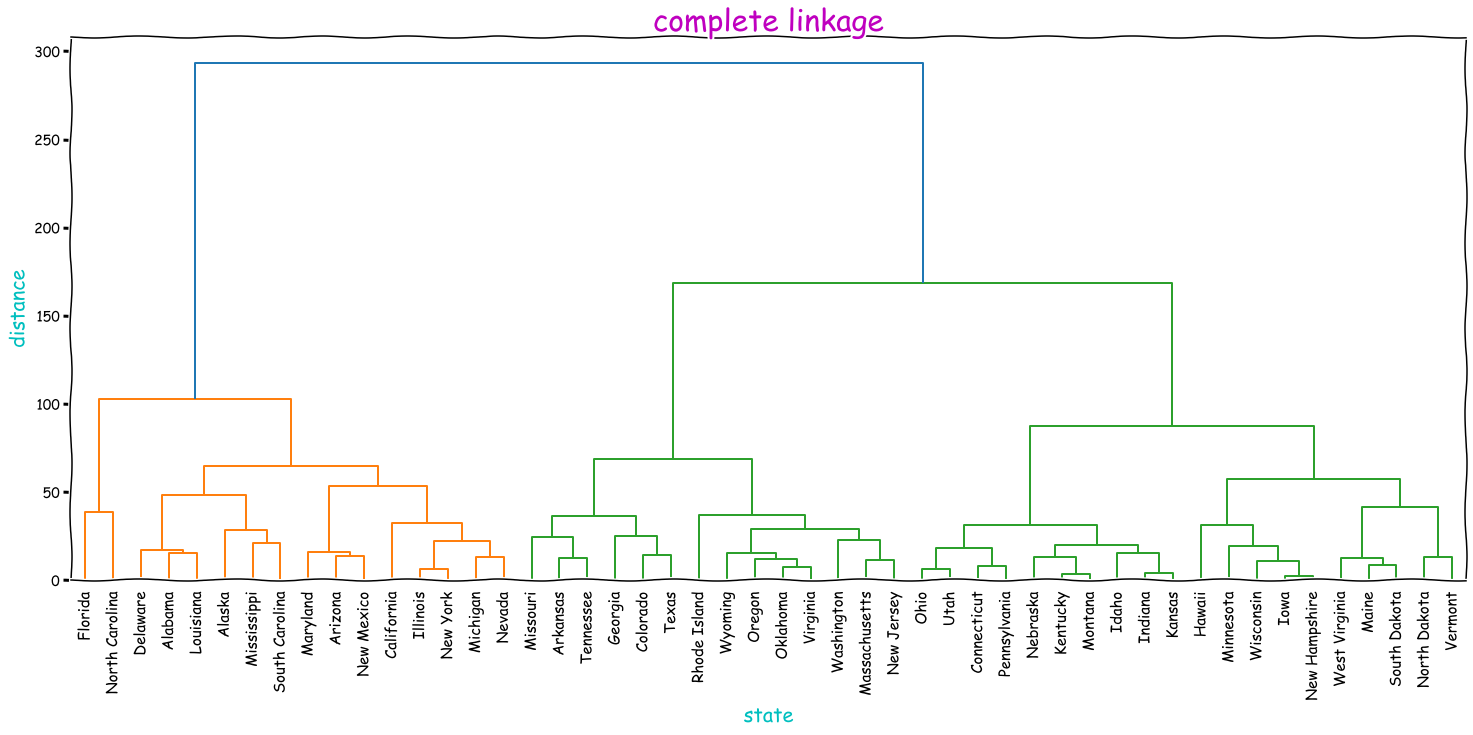

In [13]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('complete linkage', fontsize=30, color='m')
plt.xlabel('state', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
axes = USArrests.index.values
dendrogram(hc_complete, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=False, labels=axes)
plt.show()

#### (b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [14]:
hc_cut3 = pd.DataFrame(cut_tree(hc_complete, n_clusters=3),columns=['cluster'],index=USArrests.index)
hc_cut3.sort_values(by='cluster')

,cluster
Alabama,0
Michigan,0
Maryland,0
New Mexico,0
Louisiana,0
New York,0
North Carolina,0
Illinois,0
Nevada,0
South Carolina,0


#### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [15]:
X  = pd.DataFrame(StandardScaler().fit_transform(USArrests),index=USArrests.index, columns=USArrests.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [16]:
hc_complete_sc = linkage(y=X, method='complete', metric='euclidean')

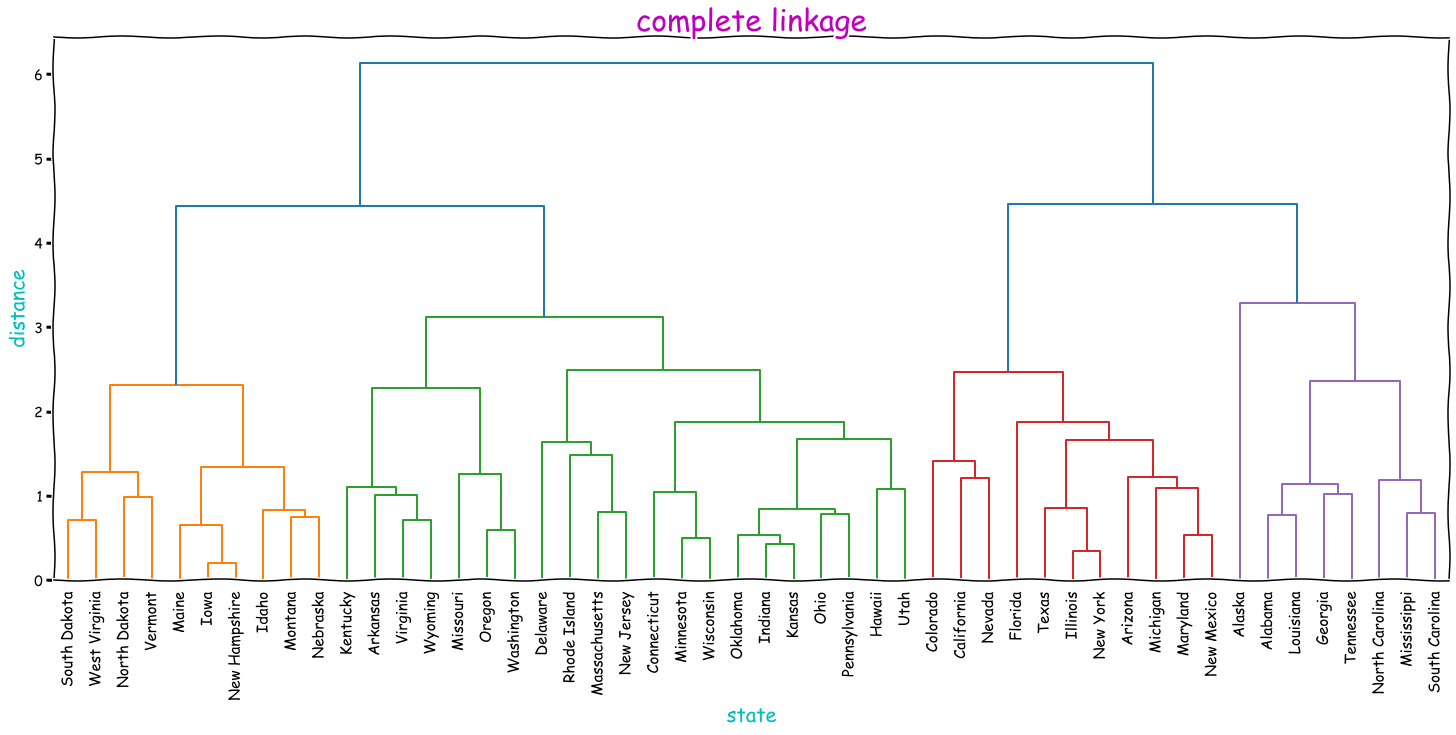

In [17]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('complete linkage', fontsize=30, color='m')
plt.xlabel('state', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
axes = USArrests.index.values
dendrogram(hc_complete_sc, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=False, labels=axes)
plt.show()

In [18]:
hc_cut3_scaled = pd.DataFrame(cut_tree(hc_complete_sc, n_clusters=3),columns=['scaled_cluster'],index=X.index)
hc_cut3_scaled.sort_values(by='scaled_cluster')

,scaled_cluster
Alabama,0
Alaska,0
North Carolina,0
Mississippi,0
Louisiana,0
South Carolina,0
Georgia,0
Tennessee,0
Nevada,1
Michigan,1


#### (d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

In [19]:
pd.crosstab(hc_cut3['cluster'],hc_cut3_scaled['scaled_cluster'])

scaled_cluster,0,1,2
cluster,,,
0,6,9,1
1,2,2,10
2,0,0,20


The cross tabulation of the different clustering results (scaled data versus unscaled data) show that the states are assigned to different clusters depending on whether or not the variables are scaled.

Not surprisingly, the variables also have vastly different variances: the `UrbanPop` variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of rapes in each state per 100,000 individuals. Failing to scale the variables before performing cluster analysis, most of the clusters that we observed could be driven by the Assault variable, since it has by far the largest mean and variance. Thus, it is important to standardize the variables to have mean zero and standard deviation one before performing hierarchical clustering.